In [1]:
import pandas as pd
df= pd.read_csv("new_sports.csv")
df.head()

,Serial ID,Unnamed: 0,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11.0,2.0,...,22,6,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2.0,16.0,...,27,6,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0.0,13.0,...,23,5,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13.0,1.0,...,3,4,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6.0,8.0,...,12,8,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022


In [2]:
# calculating the null values
null_values = df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [58]:
null_values = df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [3]:
print(df.duplicated().sum())

0


1. Position Analysis (Problem Statement 2)
2. Reporting and Visualization (Problem Statement 8)
3. Team Goals Analysis (Problem Statement 7)

# 1. Position Analysis (Problem Statement 2)

Analyze player positions to identify the highest and lowest number of players. 

In [13]:
import pandas as pd
# Load the dataset
df = pd.read_csv("new_sports.csv")

# Count the number of players in each position
position_counts = df['Position'].value_counts()
print(position_counts)


Goalkeeper    4398
Forward       4205
Defender      4063
Midfielder    3962
Name: Position, dtype: int64


Use statistical analysis to determine if the distribution of players across
positions is significantly different from a uniform distribution. 

In [14]:
import scipy.stats as stats

# Total number of players
total_players = len(df)

# Expected uniform distribution
expected_counts = [total_players / len(position_counts)] * len(position_counts)

# Chi-square test
chi2, p_value = stats.chisquare(position_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")


Chi-square statistic: 25.79889343276401, p-value: 1.0508267179826103e-05


In [15]:
import pandas as pd
import plotly.express as px

# Calculate the average age per position
avg_age_per_position = df.groupby('Position')['Age'].mean().sort_values(ascending=False)

# Create a bar plot for average age per position
fig1 = px.bar(avg_age_per_position, title='Average Age per Position')
fig1.update_layout(xaxis_title='Position', yaxis_title='Average Age')
fig1.show()


In [16]:
# Calculate the total and average goals per position
total_goals_per_position = df.groupby('Position')['Goals'].sum().sort_values(ascending=False)
avg_goals_per_position = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)

# Create a bar plot for total goals per position
fig2 = px.bar(total_goals_per_position, title='Total Goals per Position')
fig2.update_layout(xaxis_title='Position', yaxis_title='Total Goals')
fig2.show()

# Create a bar plot for average goals per position
fig3 = px.bar(avg_goals_per_position, title='Average Goals per Position')
fig3.update_layout(xaxis_title='Position', yaxis_title='Average Goals')
fig3.show()


A plot showing the count of players for each position and a pie chart for distribution.

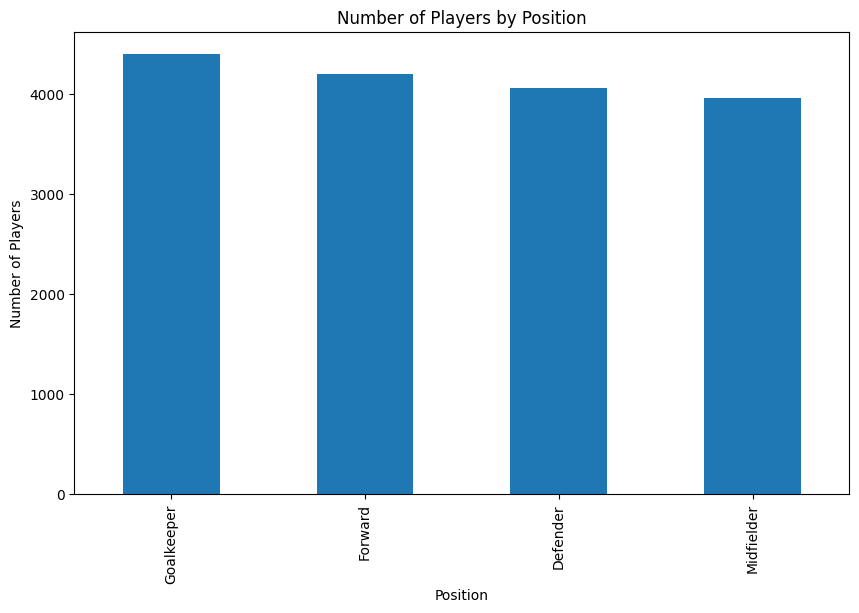

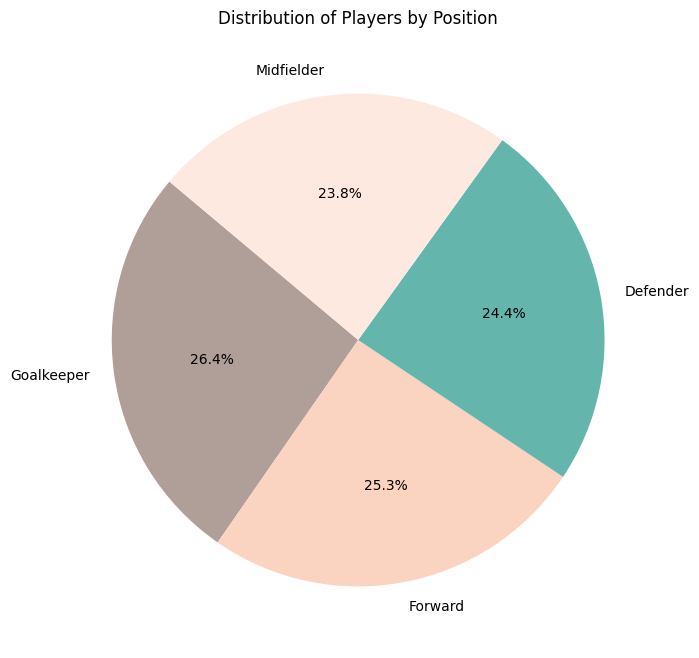

In [17]:
import matplotlib.pyplot as plt

# Bar plot for the count of players in each position
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.title('Number of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()

# Pie chart for the distribution of players by position
colors = ['#B09E99', '#FAD4C0', '#64B6AC', '#FEE9E1']
plt.figure(figsize=(8, 8))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Players by Position')
plt.ylabel('')  # Hide the y-label for the pie chart
plt.show()

Perform a chi-square test to validate your findings.

In [18]:
# Chi-square test
chi2, p_value = stats.chisquare(position_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The distribution of players across positions is significantly different from a uniform distribution (p < 0.05).")
else:
    print("The distribution of players across positions is not significantly different from a uniform distribution (p >= 0.05).")


Chi-square statistic: 25.79889343276401, p-value: 1.0508267179826103e-05
The distribution of players across positions is significantly different from a uniform distribution (p < 0.05).


#  Team Goals Analysis (Problem Statement 7)

Calculating the total goals scored by each team to identify the team with the highest number of goals.


In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("new_sports.csv")

# Calculate total goals scored by each team
team_goals = df.groupby('Team')['Goals'].sum()
top_team = team_goals.idxmax()
print("Team with the highest number of goals:", top_team)
print(team_goals)


Team with the highest number of goals: Team B
Team
Team A    159226.0
Team B    167190.0
Team C    159316.0
Name: Goals, dtype: float64


Creating a horizontal bar plot  for the goals scored by each team.

In [20]:
import plotly.express as px
import plotly.graph_objects as go

# Horizontal bar plot for goals scored by each team
fig1 = px.bar(team_goals, orientation='h', title='Total Goals Scored by Each Team')
fig1.update_layout(xaxis_title='Goals', yaxis_title='Team')
fig1.show()

# Analyze the goals scored by the top team across seasons
top_team_season_goals = df[df['Team'] == top_team].groupby('Season')['Goals'].sum().sort_index()
fig2 = px.line(top_team_season_goals, title=f'Goals Scored by {top_team} Across Seasons')
fig2.update_layout(xaxis_title='Season', yaxis_title='Goals')
fig2.show()


Analyzing the top goal scorer in the top team and his performance throughout the seasons


In [21]:
# Identify the top goal scorer in the top team
top_team_players = df[df['Team'] == top_team]
top_goal_scorer = top_team_players.groupby('Player')['Goals'].sum().idxmax()
top_goal_scorer_goals = top_team_players[top_team_players['Player'] == top_goal_scorer]

print(f"Top goal scorer in {top_team} is : ", top_goal_scorer)
print(top_goal_scorer_goals)

# Analyze the top goal scorer's performance across seasons
top_goal_scorer_season_goals = top_goal_scorer_goals.groupby('Season')['Goals'].sum().sort_index()

fig3 = px.bar(top_goal_scorer_season_goals, title=f'Goals Scored by {top_goal_scorer} Across Seasons')
fig3.update_layout(xaxis_title='Season', yaxis_title='Goals')
fig3.show()

Top goal scorer in Team B is :  Player A
       Serial ID  Unnamed: 0    Player    Team  Age      Height      Weight  \
35            36          35  Player A  Team B   35  184.950888   77.591932   
37            38          37  Player A  Team B   25  178.777394   84.643812   
72            73          72  Player A  Team B   39  197.850580   58.849836   
74            75          74  Player A  Team B   30  170.822452  109.554627   
87            88          87  Player A  Team B   18  184.833305  118.952369   
...          ...         ...       ...     ...  ...         ...         ...   
16589      16590         468  Player A  Team B   26  170.791842   78.527601   
16597      16598         132  Player A  Team B   20  169.850829   89.138838   
16609      16610        1232  Player A  Team B   27  171.488503  116.021414   
16612      16613        3313  Player A  Team B   34  191.662956  119.098185   
16616      16617        4501  Player A  Team B   30  188.851650   87.187757   

         P